<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/QuantumToyAlgorithm_BellState_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
%pip install qiskit[visualization]==1.2.4
%pip install qiskit-aer==0.15.1

In [24]:
%pip show qiskit
%pip show qiskit-aer

Name: qiskit
Version: 1.2.4
Summary: An open-source SDK for working with quantum computers at the level of extended quantum circuits, operators, and primitives.
Home-page: https://www.ibm.com/quantum/qiskit
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: dill, numpy, python-dateutil, rustworkx, scipy, stevedore, symengine, sympy, typing-extensions
Required-by: qiskit-aer
Name: qiskit-aer
Version: 0.15.1
Summary: Aer - High performance simulators for Qiskit
Home-page: https://github.com/Qiskit/qiskit-aer
Author: AER Development Team
Author-email: qiskit@us.ibm.com
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: numpy, psutil, qiskit, scipy
Required-by: 


In [25]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

In [26]:
# 시뮬레이터 설정
aer_backend = Aer.get_backend('qasm_simulator')

In [27]:
# 1. |Φ+⟩ = (|00⟩ + |11⟩)/√2
circuit_phi_plus = QuantumCircuit(2, 2)
circuit_phi_plus.h(0)  # 첫 번째 큐비트에 Hadamard 게이트 적용
circuit_phi_plus.cx(0, 1)  # CNOT 게이트 적용 (제어 큐비트: 0, 대상 큐비트: 1)
circuit_phi_plus.measure([0, 1], [0, 1])  # 큐비트 0, 1 측정 후 결과를 각각 비트 0, 1에 저장
print("Circuit for |Φ+⟩:")
print(circuit_phi_plus.draw())

# 2. |Φ-⟩ = (|00⟩ - |11⟩)/√2
circuit_phi_minus = QuantumCircuit(2, 2)
circuit_phi_minus.h(0)
circuit_phi_minus.cx(0, 1)
circuit_phi_minus.z(0) # Z 게이트 추가
circuit_phi_minus.measure([0, 1], [0, 1])
print("\nCircuit for |Φ-⟩:")
print(circuit_phi_minus.draw())

# 3. |Ψ+⟩ = (|01⟩ + |10⟩)/√2
circuit_psi_plus = QuantumCircuit(2, 2)
circuit_psi_plus.x(1) # 두 번째 큐비트를 |1> 상태로 초기화
circuit_psi_plus.h(0)
circuit_psi_plus.cx(0, 1)
circuit_psi_plus.measure([0, 1], [0, 1])
print("\nCircuit for |Ψ+⟩:")
print(circuit_psi_plus.draw())

# 4. |Ψ-⟩ = (|01⟩ - |10⟩)/√2
circuit_psi_minus = QuantumCircuit(2, 2)
circuit_psi_minus.x(1)
circuit_psi_minus.h(0)
circuit_psi_minus.cx(0, 1)
circuit_psi_minus.z(0) # Z 게이트 추가
circuit_psi_minus.measure([0, 1], [0, 1])
print("\nCircuit for |Ψ-⟩:")
print(circuit_psi_minus.draw())


Circuit for |Φ+⟩:
     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 

Circuit for |Φ-⟩:
     ┌───┐     ┌───┐┌─┐
q_0: ┤ H ├──■──┤ Z ├┤M├
     └───┘┌─┴─┐└┬─┬┘└╥┘
q_1: ─────┤ X ├─┤M├──╫─
          └───┘ └╥┘  ║ 
c: 2/════════════╩═══╩═
                 1   0 

Circuit for |Ψ+⟩:
     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     ├───┤┌─┴─┐└╥┘┌─┐
q_1: ┤ X ├┤ X ├─╫─┤M├
     └───┘└───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 

Circuit for |Ψ-⟩:
     ┌───┐     ┌───┐┌─┐
q_0: ┤ H ├──■──┤ Z ├┤M├
     ├───┤┌─┴─┐└┬─┬┘└╥┘
q_1: ┤ X ├┤ X ├─┤M├──╫─
     └───┘└───┘ └╥┘  ║ 
c: 2/════════════╩═══╩═
                 1   0 


In [28]:
# 회로 실행 및 결과 시각화 (선택 사항)
def execute_and_plot(circuit, title):
    compiled_circuit = transpile(circuit, aer_backend)

    job = aer_backend.run(compiled_circuit,  shots=1000)

    result = job.result()
    counts = result.get_counts(circuit)
    print(f"\nCounts for {title}: {counts}")

    plot = plot_histogram(counts, title=title)
    return plot
###def

In [29]:
# 각 회로 실행 및 결과 출력
plot_phi_plus = execute_and_plot(circuit_phi_plus, "|Φ+⟩")
plot_phi_minus = execute_and_plot(circuit_phi_minus, "|Φ-⟩")
plot_psi_plus = execute_and_plot(circuit_psi_plus, "|Ψ+⟩")
plot_psi_minus = execute_and_plot(circuit_psi_minus, "|Ψ-⟩")


Counts for |Φ+⟩: {'11': 531, '00': 469}

Counts for |Φ-⟩: {'11': 501, '00': 499}

Counts for |Ψ+⟩: {'10': 499, '01': 501}

Counts for |Ψ-⟩: {'01': 481, '10': 519}


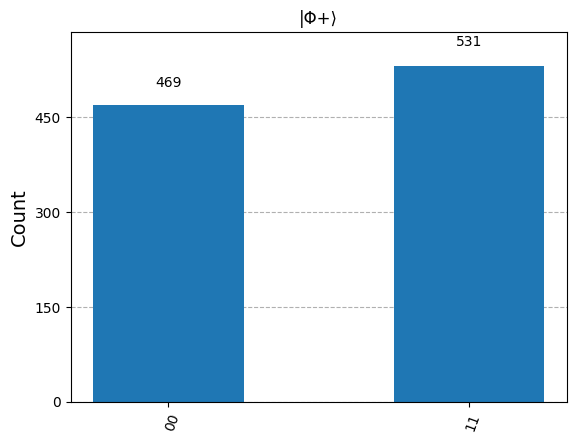

In [30]:
# 결과 그래프 출력 (주피터 노트북 환경에서)
plot_phi_plus

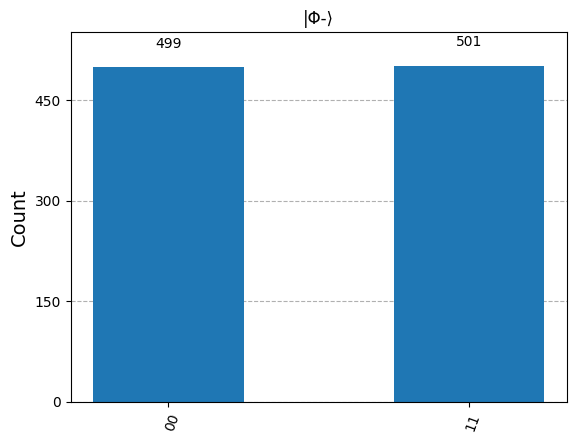

In [31]:
plot_phi_minus


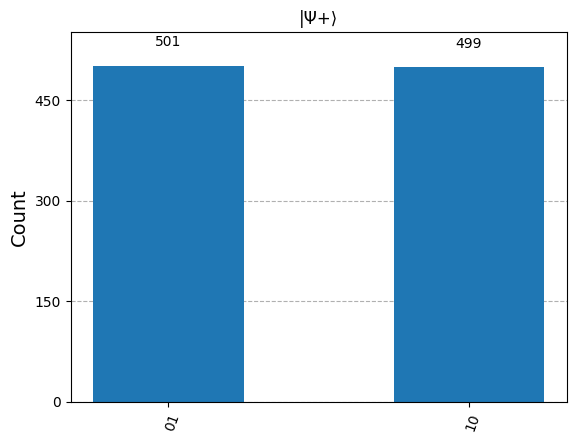

In [32]:
plot_psi_plus

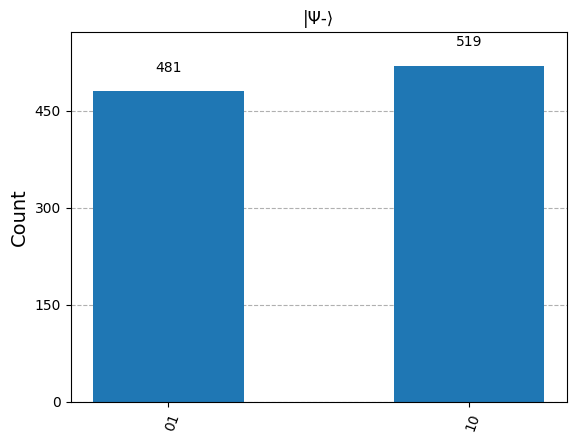

In [33]:
plot_psi_minus